<a href="https://colab.research.google.com/github/jain-sarthak007/project_1/blob/main/fakebills_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('fakebills.csv')

In [ ]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54


In [ ]:
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [ ]:
df['margin_low']=df['margin_low'].fillna(df['margin_low'].median())

In [ ]:
df.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

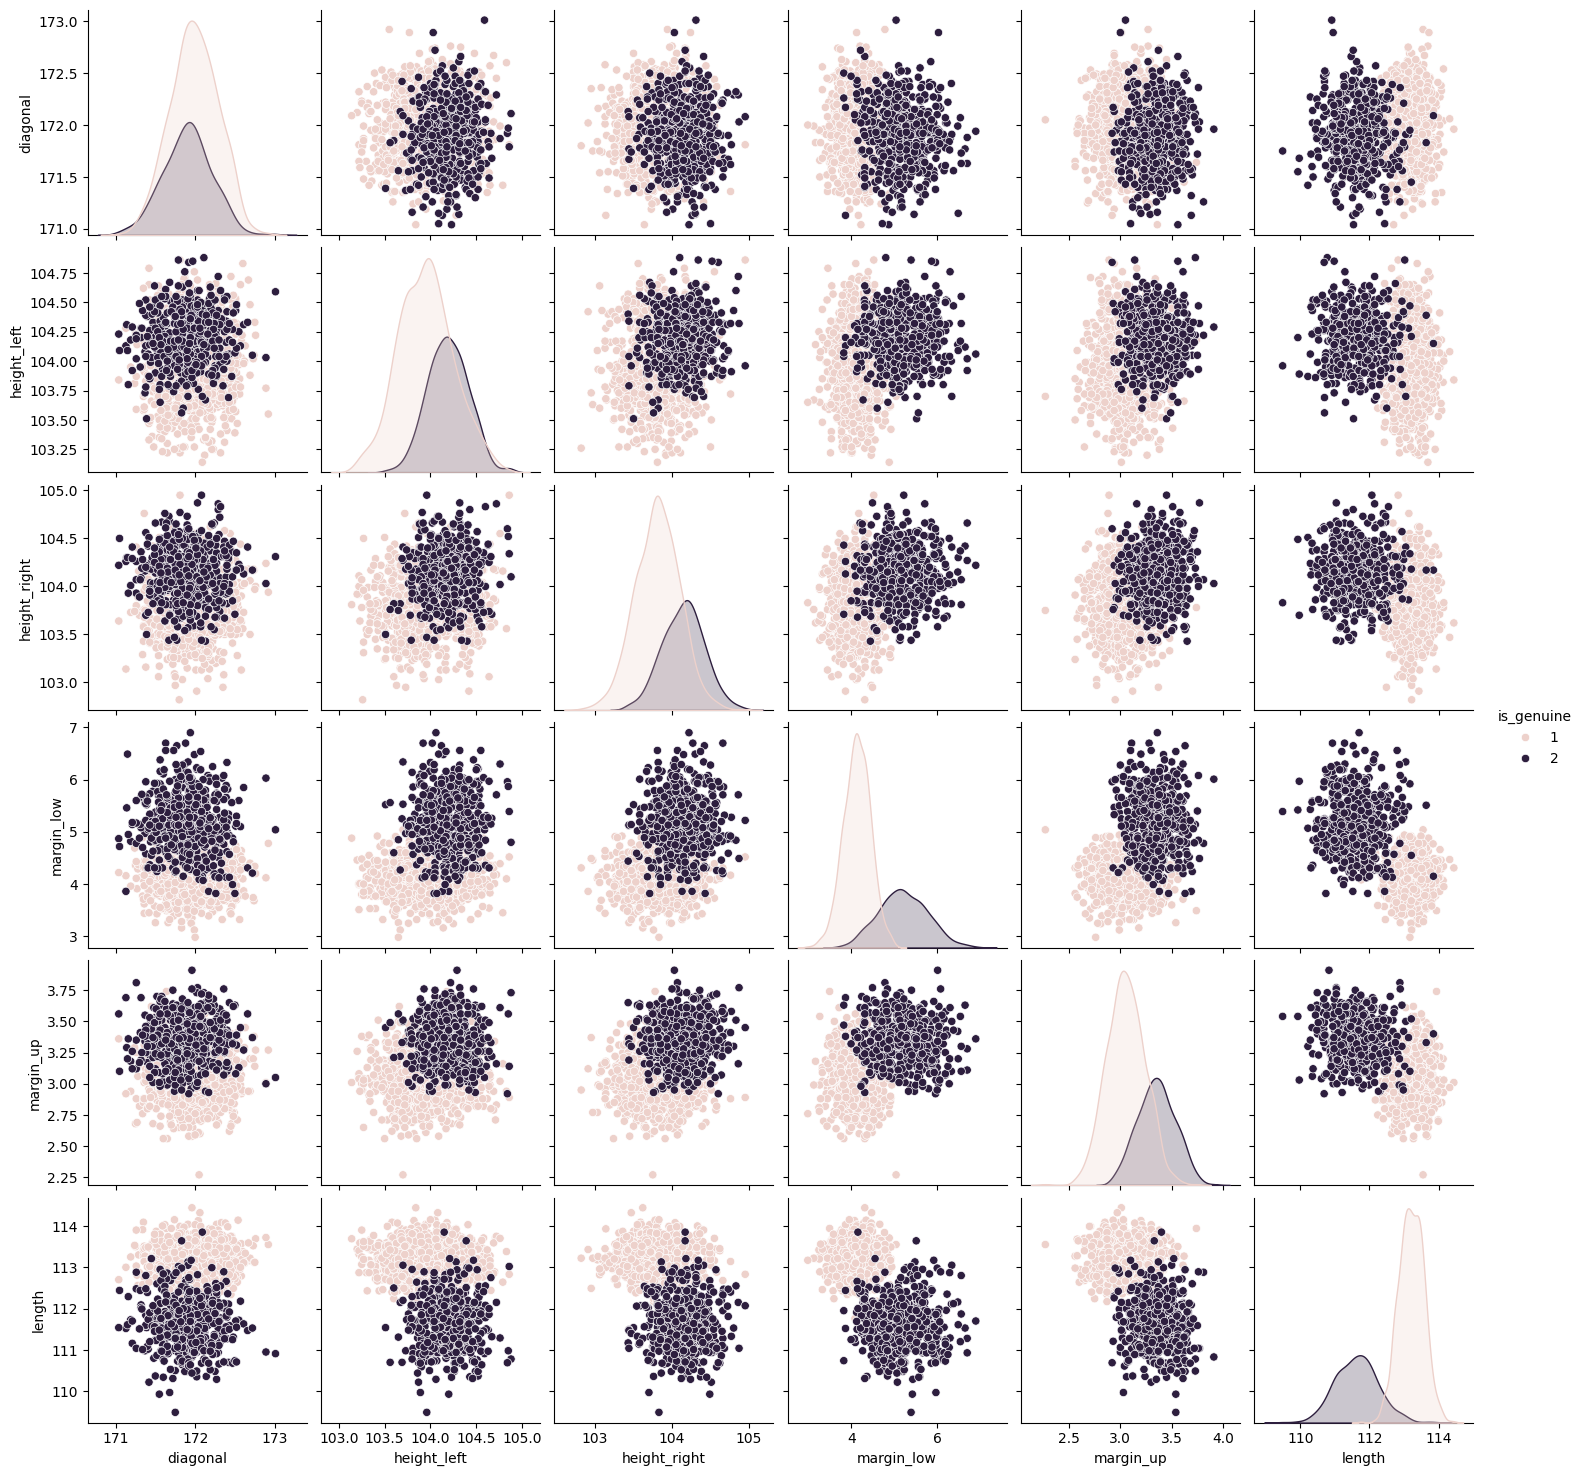

In [ ]:
sns.pairplot(df, hue='is_genuine')

In [ ]:
from sklearn.preprocessing import StandardScaler
myscaler = StandardScaler()
myscaler.fit(X = df.drop('is_genuine', axis = 1))
X = myscaler.transform(X = df.drop('is_genuine', axis = 1))

In [ ]:
tdf = pd.DataFrame(X, columns=df.columns[:-1])
tdf.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up
0,-0.486540,2.774123,3.163240,0.058503,-1.128325,0.173651
1,-1.633729,-2.236535,-0.799668,-1.084932,-0.696799,0.471666
2,2.397823,1.504756,-1.291191,-0.124446,-0.912562,0.551901
3,-1.961498,-0.399294,0.060498,-1.313618,-0.610494,0.953075
4,-0.748754,0.836669,-1.414072,-0.673295,1.417677,-0.158750


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df['is_genuine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
myKNN = KNeighborsClassifier(n_neighbors = 1)
myKNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_predict = myKNN.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,y_predict))

[[304   1]
 [  6 139]]


In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       305
           2       0.99      0.96      0.98       145

    accuracy                           0.98       450
   macro avg       0.99      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [ ]:
err_rates = []
for idx in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = idx)
    knn.fit(X_train, y_train)
    pred_idx = knn.predict(X_test)
    err_rates.append(np.mean(y_test != pred_idx))

Text(0.5, 1.0, 'Error Rate vs K-value')

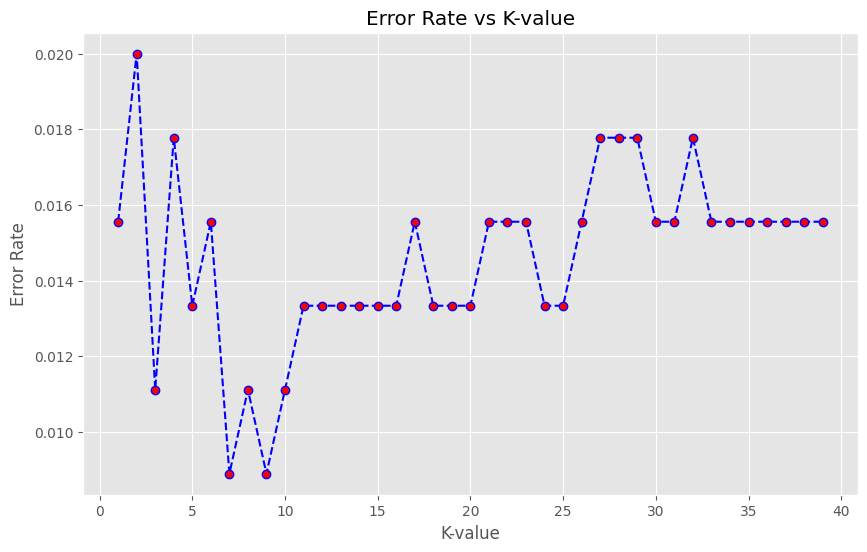

In [ ]:
plt.style.use('ggplot')
plt.subplots(figsize = (10,6))
plt.plot(range(1,40), err_rates, linestyle = 'dashed', color = 'blue', marker = 'o', markerfacecolor = 'red')
plt.xlabel('K-value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K-value')

In [ ]:
myKNN = KNeighborsClassifier(n_neighbors =11)
myKNN.fit(X_train,y_train)
y_predict = myKNN.predict(X_test)

print('WITH K=11')
print('')
print(confusion_matrix(y_test,y_predict))
print('')
print(classification_report(y_test,y_predict))

WITH K=11

[[304   1]
 [  5 140]]

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       305
           2       0.99      0.97      0.98       145

    accuracy                           0.99       450
   macro avg       0.99      0.98      0.98       450
weighted avg       0.99      0.99      0.99       450

